In [11]:
import pandas as pd
from PIL import Image
import requests
from farfetch import api
import datetime

In [12]:
# Parse FF
date = datetime.datetime.today().strftime('%m-%d-%y')

api = api.Api()
total_pages = api.get_listings()['listingPagination']['totalPages']


def run():
    for page in range(1, 5): # get 5 pages for example
        print(page)
        api.parse_products(
            api.get_listings(page=page)
        )
    return api.df


run()
api.df.to_csv('current_farfetch_listings' + date + '.csv')


1
2
3
4


In [13]:
df = pd.read_csv('current_farfetch_listings' + date + '.csv', index_col=0)

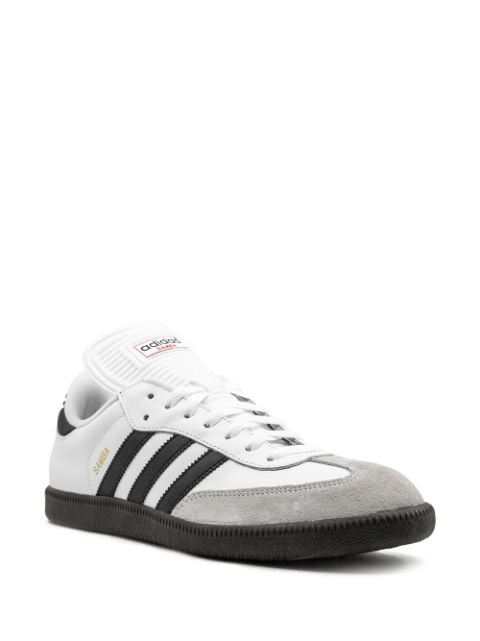

In [14]:
image_url = df.loc[0,"images.model"]
image = Image.open(requests.get(image_url, stream=True).raw)
image